In [0]:
# %matplotlib inline
import numpy
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow                 import keras
from   tensorflow.keras           import layers
from   tensorflow.keras.callbacks import EarlyStopping
from   sklearn.preprocessing      import LabelEncoder, OneHotEncoder
from   sklearn.model_selection    import train_test_split
from   sklearn.ensemble           import ExtraTreesClassifier

In [0]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving zoo.csv to zoo.csv


In [282]:
print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

Versions:
Tensorflow: 1.14.0
Keras:  2.2.4-tf


In [0]:
# Load iris dataset
path = "./zoo.csv"
dataset = pd.read_csv(path)

In [287]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [0]:
y = dataset["class_type"]

# Remove unnecessary columns
del dataset["animal_name"]
del dataset["class_type"]
del dataset["catsize"]
del dataset["domestic"]

(101, 14)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


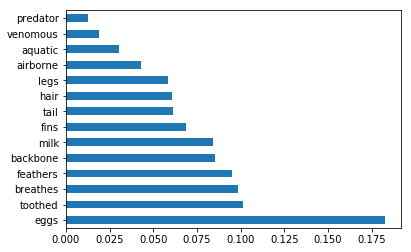

In [289]:
# Feature selection (feature importance)
print(dataset.shape)

X = pd.DataFrame.copy(dataset)
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [0]:
# Generate dummy columns
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df
  
X = generate_dummies(X, "legs")

del X["legs"]

In [291]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0


In [292]:
y.head(10)

0    1
1    1
2    4
3    1
4    1
5    1
6    1
7    4
8    4
9    1
Name: class_type, dtype: int64

In [0]:
# Change the range of target variables from [1,7] to [0,6]
for c, animal_class in enumerate(y):
  y[c] = animal_class-1

In [294]:
y.head(10)

0    0
1    0
2    3
3    0
4    0
5    0
6    0
7    3
8    3
9    0
Name: class_type, dtype: int64

In [0]:
dimension = X.shape[1]

In [0]:
NB_EPOCHS = 150  # num of epochs to test for
BATCH_SIZE = dimension

In [0]:
# Split the dataset into train and testset
TESTSIZE = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TESTSIZE, random_state = 0)

In [0]:
# Ensure that fieldnames aren't included
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [318]:
# Create our model
model = tf.keras.Sequential()
model.add(layers.Dense(dimension+2, input_dim = dimension, activation='elu'))
model.add(layers.Dense(dimension+2, input_dim = dimension, activation='elu'))
model.add(layers.Dense(7,           input_dim = dimension, activation='sigmoid'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 21)                420       
_________________________________________________________________
dense_57 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_58 (Dense)             (None, 7)                 154       
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [320]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)

# Train the model, store the results for plotting
print('Training...')
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    nb_epoch        = NB_EPOCHS,
                    batch_size      = BATCH_SIZE,
                    callbacks       = [early_stopping_monitor],
                    verbose         = 1)

W0711 22:51:55.307066 139970760935296 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Training...
Train on 70 samples, validate on 31 samples
Epoch 1/150
70/70 [==============================] - 0s 6ms/sample - loss: 2.0554 - acc: 0.0143 - val_loss: 1.9672 - val_acc: 0.0000e+00
Epoch 2/150
70/70 [==============================] - 0s 277us/sample - loss: 1.9783 - acc: 0.0143 - val_loss: 1.9090 - val_acc: 0.0645
Epoch 3/150
70/70 [==============================] - 0s 223us/sample - loss: 1.9099 - acc: 0.1143 - val_loss: 1.8560 - val_acc: 0.1290
Epoch 4/150
70/70 [==============================] - 0s 274us/sample - loss: 1.8537 - acc: 0.2571 - val_loss: 1.8095 - val_acc: 0.3871
Epoch 5/150
70/70 [==============================] - 0s 296us/sample - loss: 1.7991 - acc: 0.5000 - val_loss: 1.7672 - val_acc: 0.4839
Epoch 6/150
70/70 [==============================] - 0s 249us/sample - loss: 1.7525 - acc: 0.5857 - val_loss: 1.7291 - val_acc: 0.5161
Epoch 7/150
70/70 [==============================] - 0s 212us/sample - loss: 1.7108 - acc: 0.5857 - val_loss: 1.6933 - val_acc: 0.51

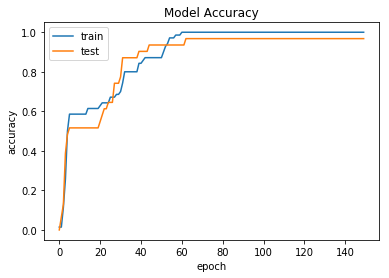

In [321]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

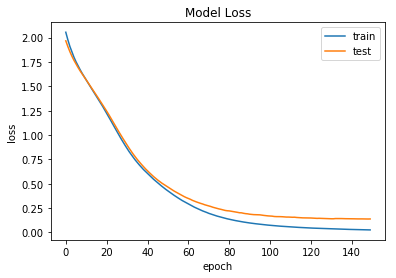

In [322]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [323]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 96.77%
